<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1-Introduction" data-toc-modified-id="1-Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>1 Introduction</a></span><ul class="toc-item"><li><span><a href="#1.1-Data-source" data-toc-modified-id="1.1-Data-source-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>1.1 Data source</a></span></li></ul></li><li><span><a href="#2.-EDA-(Exploratory-Data-Analysis)" data-toc-modified-id="2.-EDA-(Exploratory-Data-Analysis)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>2. EDA (Exploratory Data Analysis)</a></span><ul class="toc-item"><li><span><a href="#2.1-Objectives" data-toc-modified-id="2.1-Objectives-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>2.1 Objectives</a></span></li><li><span><a href="#2.2-Load-Data" data-toc-modified-id="2.2-Load-Data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>2.2 Load Data</a></span></li><li><span><a href="#2.3-Missing-Values" data-toc-modified-id="2.3-Missing-Values-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>2.3 Missing Values</a></span><ul class="toc-item"><li><span><a href="#2.3.1-Distribution-of-the-data" data-toc-modified-id="2.3.1-Distribution-of-the-data-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>2.3.1 Distribution of the data</a></span></li><li><span><a href="#2.3.2.-Basic-statistic-for-the-data" data-toc-modified-id="2.3.2.-Basic-statistic-for-the-data-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>2.3.2. Basic statistic for the data</a></span></li></ul></li><li><span><a href="#2.4-Circuits-and-lap-times" data-toc-modified-id="2.4-Circuits-and-lap-times-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>2.4 Circuits and lap times</a></span></li></ul></li></ul></div>

In [1]:
# Default libraries: pandas, numpy
import cProfile
import datetime
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pd.options.display.float_format = "{:.2f}".format
# plt.rcParams.update({'font.size': 18})

# 1 Introduction

Technology, speed, precision, innovation - these adjectives can describe a data science project, but we are using them to talk about Formula-1 racing. Then on a quick analysis, I'll try to showcase the years when we had considerable evolution or throwbacks in the fastest time laps for circuits that are part of F-1 history.

I'm expecting to find these changes in the years when were the teams adopted new tires, engines, or aerodynamics changes to the cars. So let's check these assumptions using the data.

## 1.1 Data source

Using the Kaggle repository: https://www.kaggle.com/rohanrao/formula-1-world-championship-1950-2020, we will evaluate some performance data of races from 1950 to 2021 and try to devise when we had significant changes to the time lap.

We have available the data for:
- circuits
- constructors
- constructor standings
- constructor results
- drivers
- driver standings
- lap times
- pit stops
- qualifying
- races
- results
- seasons
- status

We will use only the lap times and races tables.

# 2. EDA (Exploratory Data Analysis)

## 2.1 Objectives

Data preparation and integrity check for the analysis:
- check for anomalies in the data
- features available on the tables

## 2.2 Load Data

In [2]:
path = os.getcwd() + '\\data\\'

lap = pd.read_csv(path + 'lap_times.csv',
                    index_col=None,
                    delimiter=',')
type(lap)
lap.info()
lap.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514592 entries, 0 to 514591
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   raceId        514592 non-null  int64 
 1   driverId      514592 non-null  int64 
 2   lap           514592 non-null  int64 
 3   position      514592 non-null  int64 
 4   time          514592 non-null  object
 5   milliseconds  514592 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 23.6+ MB


,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


In [3]:
races = pd.read_csv(path + 'races.csv',
                    index_col=None,
                    delimiter=',')
type(races)
races.info()
races.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   raceId     1080 non-null   int64 
 1   year       1080 non-null   int64 
 2   round      1080 non-null   int64 
 3   circuitId  1080 non-null   int64 
 4   name       1080 non-null   object
 5   date       1080 non-null   object
 6   time       1080 non-null   object
 7   url        1080 non-null   object
dtypes: int64(4), object(4)
memory usage: 67.6+ KB


,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


We notice that we have all laps on this table, but we need only the fastest lap. So let's keep only the fastest lap and get the race details for those laps.

In [4]:
lap['fastest'] = lap.groupby(['raceId'])['milliseconds'].transform(min)
lap = lap[lap['fastest']==lap['milliseconds']]
fastest = lap[['raceId','time','milliseconds']].reset_index()
fastest = fastest.drop(axis = 1, columns='index')
df = fastest.merge(races[['year','circuitId','name','raceId']], on='raceId', how='left')
df

,raceId,time,milliseconds,year,circuitId,name
0,841,1:28.947,88947,2011,1,Australian Grand Prix
1,842,1:40.571,100571,2011,2,Malaysian Grand Prix
2,843,1:38.993,98993,2011,17,Chinese Grand Prix
3,844,1:29.703,89703,2011,5,Turkish Grand Prix
4,845,1:26.727,86727,2011,4,Spanish Grand Prix
...,...,...,...,...,...,...
471,1070,1:17.774,77774,2021,32,Mexico City Grand Prix
472,1071,1:11.010,71010,2021,18,São Paulo Grand Prix
473,1051,1:23.196,83196,2021,78,Qatar Grand Prix
474,1072,1:30.734,90734,2021,77,Saudi Arabian Grand Prix


Now we have all the fastest laps for all the races.

## 2.3 Missing Values

Count the number of missing values in each column.

In [5]:
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()],
                    axis=1)
missing.columns = ['count', '%']
missing = missing[missing['count'] > 0]
missing.sort_values(by='%', ascending=False)

,count,%


- **Columns with missing data**: 0

No Missing data
<!-- - **Missing most**: `Sufalte` - 23.8% -->
<!-- - **Target missing**: none -->

<!-- Removing all the entries with some missing values:
- **remove**: 1265
- ***keep***: 2011 -->

### 2.3.1 Distribution of the data

Showcasing the frequency distribution for all data.

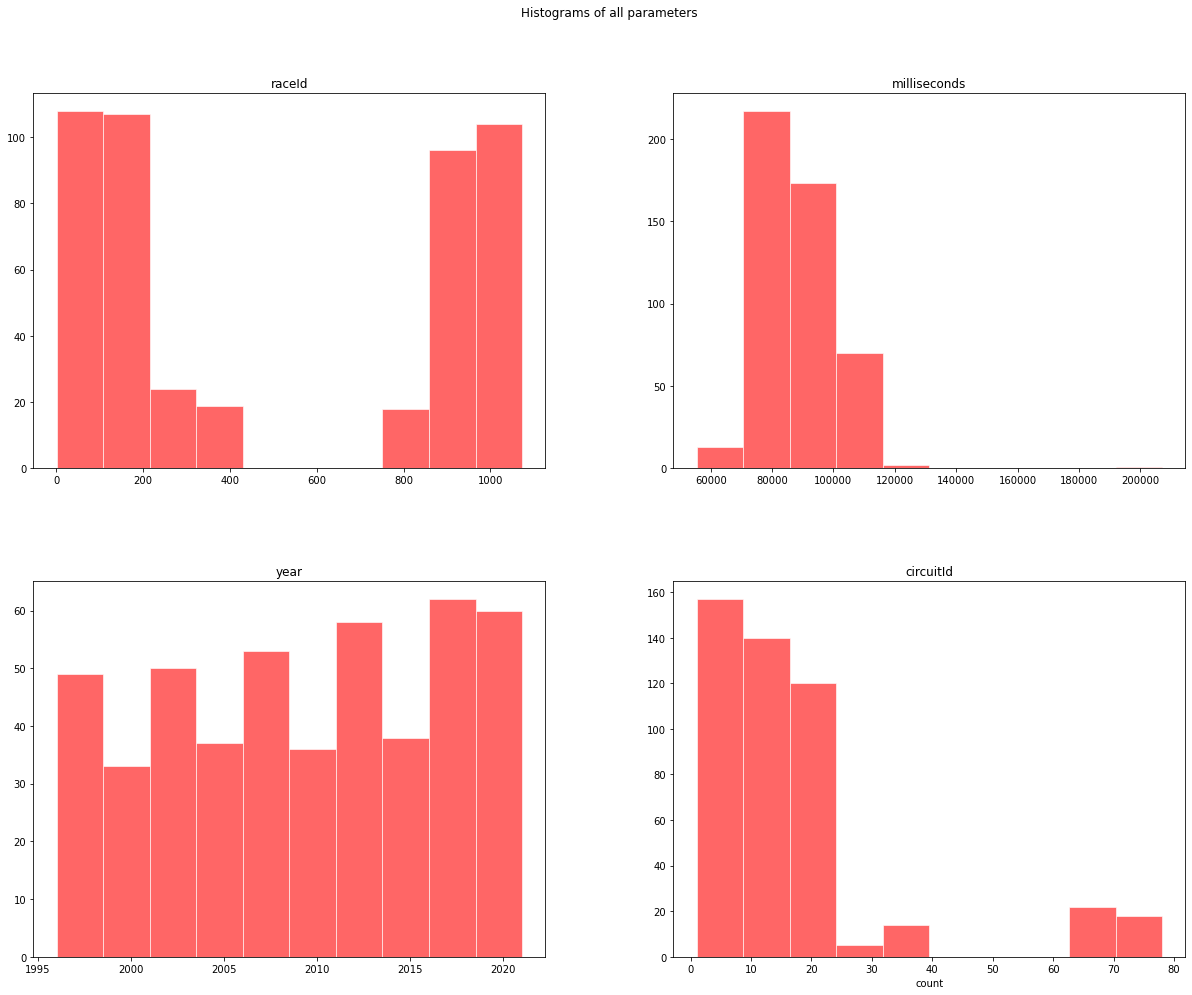

In [6]:
# Histograms of all numeric features
df.hist(figsize=(20, 15),color='red',grid=False,edgecolor='white',alpha=.6)
plt.subplots_adjust(left=0.1,
                        bottom=0.1,
                        right=0.9,
                        top=0.9,
                        wspace=0.25,
                        hspace=0.3
                   );
plt.xlabel('count')
plt.suptitle('Histograms of all parameters');

- **Distribution**:
    - The distribution presented no surprises
    - No zeros or obvious outliers
- **Constant values**:
    - None

### 2.3.2. Basic statistic for the data

- Visualization of each parameter split into potable and non-potable using a box-plot
- Evaluation of the summary of their statistical metrics.

In [7]:
# Statistical summary of the numerical columns
summ = df.describe().transpose()
summ

,count,mean,std,min,25%,50%,75%,max
raceId,476.00,512.29,416.83,1.00,119.75,238.50,950.25,1073.00
milliseconds,476.00,88169.32,12772.07,55404.00,78446.50,86233.50,96479.50,207071.00
year,476.00,2009.07,7.49,1996.00,2003.00,2009.00,2016.00,2021.00
circuitId,476.00,17.23,17.97,1.00,6.00,13.00,20.00,78.00


Statistical summary:
- **Range**: no negative values or zeros.
- **Anomalies** (e.g., outside the range such as -1 and 999): absent

Data is complete, no outliers, or missing values.

## 2.4 Circuits and lap times

In [8]:
circuits = df.groupby(['circuitId','name']).size().reset_index()
circuits

,circuitId,name,0
0,1,Australian Grand Prix,24
1,2,Malaysian Grand Prix,19
2,3,Bahrain Grand Prix,17
3,3,Sakhir Grand Prix,1
4,4,Spanish Grand Prix,26
5,5,Turkish Grand Prix,9
6,6,Monaco Grand Prix,25
7,7,Canadian Grand Prix,23
8,8,French Grand Prix,13
9,9,70th Anniversary Grand Prix,1


For the sake of simplicity, let's consider only circuits with more than 20 races.

In [9]:
circuits = df.groupby('circuitId').agg(cnt=('circuitId', 'count')).reset_index()
circuits = circuits[circuits['cnt'] >= 20]
circuits
# profiling_grid.sort_values('accuracy', ascending=False).drop(columns=['start_training','end_training','start_test','end_test']).reset_index(drop=True)
# circuits.sort_values('0', ascending=False)

# .rename(columns={'count':'cnt'})
# circuits

,circuitId,cnt
0,1,24
3,4,26
5,6,25
6,7,23
8,9,27
10,11,26
12,13,24
13,14,26
17,18,25
21,22,22


In [10]:
df = df[df.circuitId.isin(circuits.circuitId)]
df

,raceId,time,milliseconds,year,circuitId,name
0,841,1:28.947,88947,2011,1,Australian Grand Prix
4,845,1:26.727,86727,2011,4,Spanish Grand Prix
5,846,1:16.234,76234,2011,6,Monaco Grand Prix
6,847,1:16.956,76956,2011,7,Canadian Grand Prix
8,849,1:33.391,93391,2011,9,British Grand Prix
...,...,...,...,...,...,...
463,1061,1:28.617,88617,2021,9,British Grand Prix
464,1062,1:18.394,78394,2021,11,Hungarian Grand Prix
465,1063,3:27.071,207071,2021,13,Belgian Grand Prix
467,1065,1:24.812,84812,2021,14,Italian Grand Prix


In [11]:
circuits = df.groupby(['circuitId','name']).size().reset_index()
circuits

,circuitId,name,0
0,1,Australian Grand Prix,24
1,4,Spanish Grand Prix,26
2,6,Monaco Grand Prix,25
3,7,Canadian Grand Prix,23
4,9,70th Anniversary Grand Prix,1
5,9,British Grand Prix,26
6,11,Hungarian Grand Prix,26
7,13,Belgian Grand Prix,24
8,14,Italian Grand Prix,26
9,18,Brazilian Grand Prix,24


Replace the names that appear just one time but occurred in the same circuit.

In [12]:
df = df.replace(to_replace ="São Paulo Grand Prix",
                 value ="Brazilian Grand Prix")
df = df.replace(to_replace ="70th Anniversary Grand Prix",
                 value ="British Grand Prix")
df.reset_index()

,index,raceId,time,milliseconds,year,circuitId,name
0,0,841,1:28.947,88947,2011,1,Australian Grand Prix
1,4,845,1:26.727,86727,2011,4,Spanish Grand Prix
2,5,846,1:16.234,76234,2011,6,Monaco Grand Prix
3,6,847,1:16.956,76956,2011,7,Canadian Grand Prix
4,8,849,1:33.391,93391,2011,9,British Grand Prix
...,...,...,...,...,...,...,...
243,463,1061,1:28.617,88617,2021,9,British Grand Prix
244,464,1062,1:18.394,78394,2021,11,Hungarian Grand Prix
245,465,1063,3:27.071,207071,2021,13,Belgian Grand Prix
246,467,1065,1:24.812,84812,2021,14,Italian Grand Prix


In [13]:
circuits = df.groupby(['circuitId','name']).size().reset_index()
circuits

,circuitId,name,0
0,1,Australian Grand Prix,24
1,4,Spanish Grand Prix,26
2,6,Monaco Grand Prix,25
3,7,Canadian Grand Prix,23
4,9,British Grand Prix,27
5,11,Hungarian Grand Prix,26
6,13,Belgian Grand Prix,24
7,14,Italian Grand Prix,26
8,18,Brazilian Grand Prix,25
9,22,Japanese Grand Prix,22


In [14]:
pv = pd.pivot_table(df, values = ['milliseconds'], index = ['year'], columns='name')
pv

milliseconds                                          \
name Australian Grand Prix Belgian Grand Prix Brazilian Grand Prix   
year                                                                 
1996              93421.00          113067.00             81547.00   
1997              90585.00          112692.00             78397.00   
1998              91649.00          123766.00             79337.00   
1999              92112.00          113955.00             78448.00   
2000              91481.00          113803.00             74755.00   
2001              88214.00          109758.00             75693.00   
2002              88541.00          107176.00             76079.00   
2003              87724.00                NaN             82032.00   
2004              84125.00          105108.00             71473.00   
2005              85683.00          111453.00             72268.00   
2006              86045.00                NaN             72162.00   
2007              85235.00          108036.00             72445.00   
2008              87418.00          107930.00             73736.00   
2009              87706.00          107263.00             73733.00   
2010              88358.00          109069.00             73851.00   
2011              88947.00          109883.00             75324.00   
2012              89187.00          112822.00             78069.00   
2013              89274.00          110756.00             75436.00   
2014              92478.00          110511.00             73555.00   
2015              90945.00          112416.00             74832.00   
2016              88997.00          111583.00             85305.00   
2017              86538.00          106577.00             71044.00   
2018              85945.00          106286.00             70540.00   
2019              85580.00          106409.00             70698.00   
2020                   NaN          107483.00                  NaN   
2021                   NaN          207071.00             71010.00   

                                                                  \
name British Grand Prix Canadian Grand Prix Hungarian Grand Prix   
year                                                               
1996           89288.00            81916.00             80093.00   
1997           84475.00            79635.00             78372.00   
1998           95704.00            79379.00             79286.00   
1999           88309.00            80382.00             80699.00   
2000           86217.00            79049.00             80028.00   
2001           83405.00            77205.00             76723.00   
2002           83083.00            75960.00             76207.00   
2003           82236.00            76040.00             82095.00   
2004           78739.00            73622.00             79071.00   
2005           80502.00            74384.00             81219.00   
2006           81599.00            75841.00             83516.00   
2007           80638.00            76367.00             80047.00   
2008           92150.00            77387.00             81195.00   
2009           80735.00                 NaN             81931.00   
2010           90874.00            76972.00             82362.00   
2011           93391.00            76956.00             83415.00   
2012           94608.00            75752.00             84136.00   
2013           93401.00            76182.00             84069.00   
2014           97176.00            78504.00             85724.00   
2015           96610.00            76987.00             84821.00   
2016           95548.00            75599.00             83086.00   
2017           90621.00            74551.00             80182.00   
2018           90696.00            73864.00             80012.00   
2019           87369.00            73078.00             77103.00   
2020           87774.00                 NaN             76627.00   
2021           88617.00                 NaN             78394.00   

          

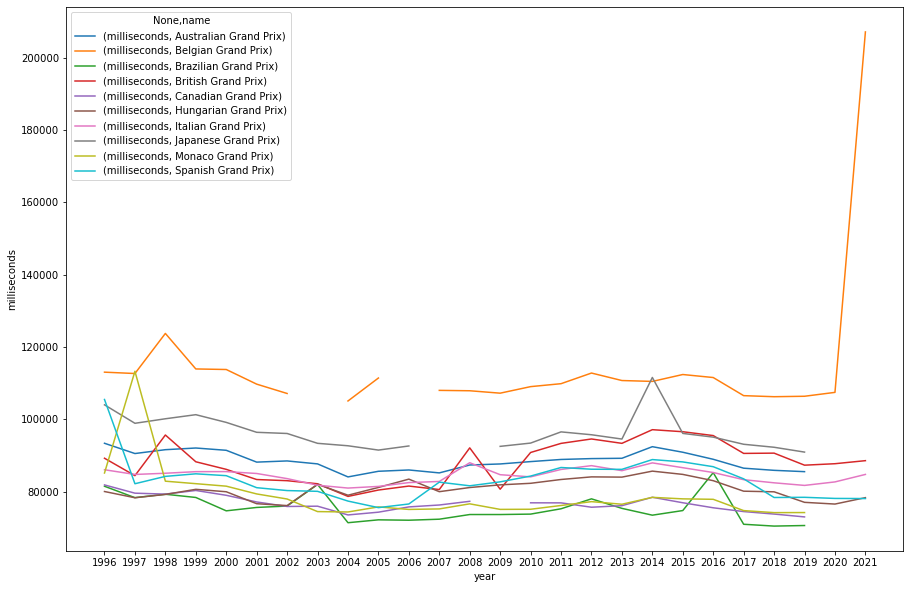

In [15]:
pv.plot(figsize=(15, 10),xticks=pv.index, ylabel='milliseconds');

We notice that Belgian, Hungarian, and Canadian Grand Prix have some years without data. So let's remove them and also the year after 2019.

In [16]:
df = df[df.year < 2019]
df = df[df['circuitId'] != 7]
df = df[df['circuitId'] != 13]
df = df[df['circuitId'] != 22]
df

,raceId,time,milliseconds,year,circuitId,name
0,841,1:28.947,88947,2011,1,Australian Grand Prix
4,845,1:26.727,86727,2011,4,Spanish Grand Prix
5,846,1:16.234,76234,2011,6,Monaco Grand Prix
8,849,1:33.391,93391,2011,9,British Grand Prix
10,851,1:23.415,83415,2011,11,Hungarian Grand Prix
...,...,...,...,...,...,...
400,994,1:14.260,74260,2018,6,Monaco Grand Prix
404,998,1:30.696,90696,2018,9,British Grand Prix
406,1000,1:20.012,80012,2018,11,Hungarian Grand Prix
408,1002,1:22.497,82497,2018,14,Italian Grand Prix


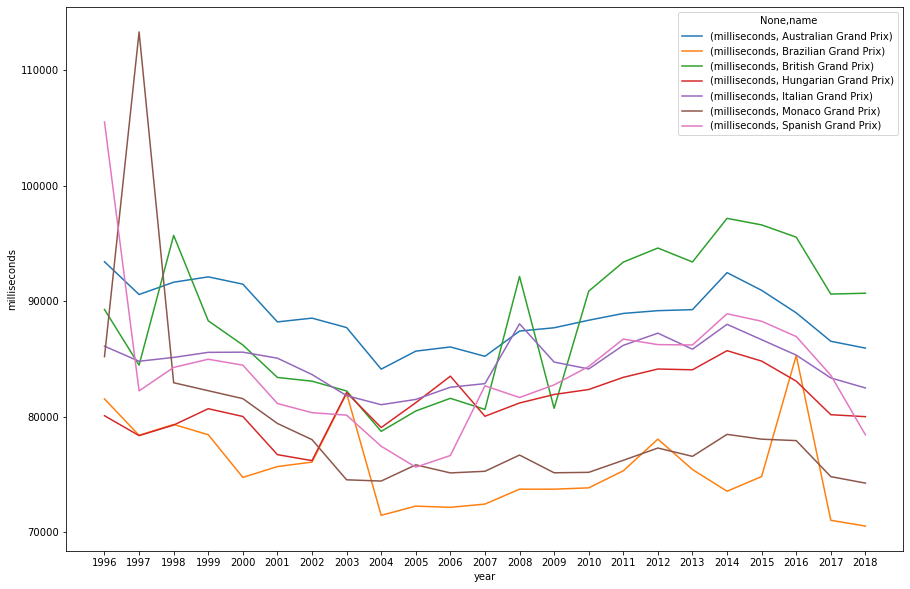

In [17]:
pv = pd.pivot_table(df, values = ['milliseconds'], index = ['year'], columns='name')
pv.plot(figsize=(15, 10),xticks=pv.index, ylabel='milliseconds');

In [18]:
# df['average'] = df.groupby(['year'])['milliseconds'].transform(average)
fastest = df.groupby('year').agg(avg_lap_time=('milliseconds', 'mean'))
fastest

,avg_lap_time
year,
1996,88740.14
1997,87456.29
1998,85476.86
1999,84626.86
2000,83445.29
2001,81383.29
2002,80849.29
2003,81515.29
2004,78049.00


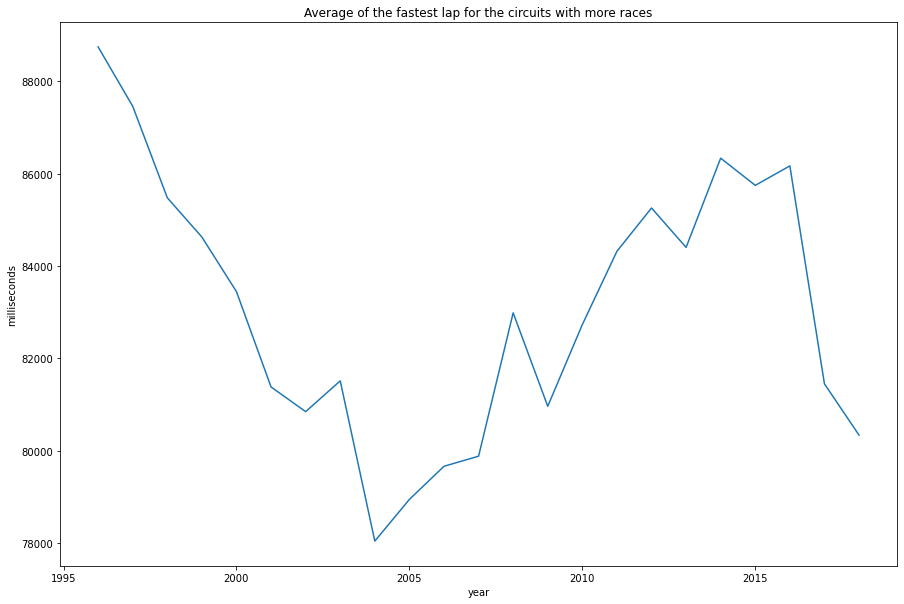

In [19]:
fastest.avg_lap_time.plot(figsize=(15, 10), ylabel='milliseconds', xlabel='year');
plt.title('Average of the fastest lap for the circuits with more races')
plt.rcParams['axes.grid'] = True;

Comparing the year-over-year fastest laps to the FIA regulations modifications and new technologies developed, it is easy to find clear reasoning for the movements in the time laps that we measured.

- From 1996 to 2002, the fastest lap improved year over year, but in 2003 it was worse than in the previous year.

- 2004 was the fastest season and the last season when electronic driving aids were allowed. 

- In 2006, only V8 engines were allowed 

- In 2008, a lot of aerodynamics gadgets were used by the teams

- In 2009, we had another throwback, consequence of FIA restrictions to all wings size and other aerodynamics features

- In 2010, refueling during the races was banned. The cars had to start the race with all the fuel required for the whole race. Heavier cars equal slower time laps.

- 2011: double diffuser banned

- 2014: V6 turbocharged-hybrid engines

- 2017: wide-body cars, larger tires, and bigger front wings generate more down-force and speed at the cornering

We can notice that after each change applied by the FIA, the teams found solutions to improve performance, and in the following year, FIA came with new regulations. It is a constant cat and mice relationship.

For more details: https://en.wikipedia.org/wiki/History_of_Formula_One_regulations